#### IMPORT LIBRARIES

In [1]:
!pip install matplotlib
!pip install seaborn
!pip install xgboost
!pip install catboost

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

#### Read .csv

In [3]:
data = pd.read_csv('/content/Loan_default.csv')
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


#### Check Data

In [4]:
data.isnull().sum()

,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

#### LABEL ENCODER

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
obj_col = ['HasCoSigner','LoanPurpose','HasDependents', 'HasMortgage','MaritalStatus', 'EmploymentType', 'Education']
for col in obj_col:
    data[col] = le.fit_transform(data[col])

data = data.drop(['LoanID'], axis=1)
data.dtypes

,0
Age,int64
Income,int64
LoanAmount,int64
CreditScore,int64
MonthsEmployed,int64
NumCreditLines,int64
InterestRate,float64
LoanTerm,int64
DTIRatio,float64
Education,int64


#### CORRELATIONS WITH TARGET

In [7]:
corr = data.corrwith(data['Default'])
print(corr.sort_values(ascending=False))

Default           1.000000
InterestRate      0.131273
LoanAmount        0.086659
EmploymentType    0.041010
NumCreditLines    0.028330
DTIRatio          0.019236
LoanTerm          0.000545
MaritalStatus    -0.007902
LoanPurpose      -0.010096
Education        -0.022835
HasMortgage      -0.022856
CreditScore      -0.034166
HasDependents    -0.034678
HasCoSigner      -0.039109
MonthsEmployed   -0.097374
Income           -0.099119
Age              -0.167783
dtype: float64


<Axes: >

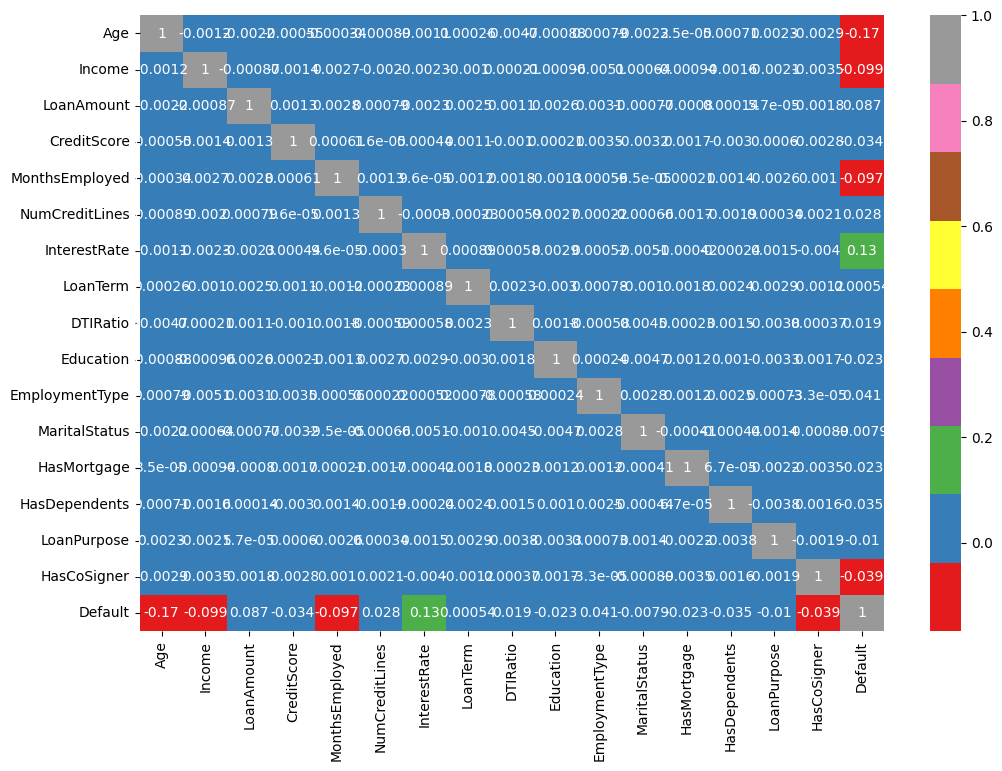

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
corr2 = data.corr()
sns.heatmap(corr2, annot=True, cmap='Set1')

#### DATA VISUALIZATION

#### SPLIT DATA FOR CLASSIFICATION

In [9]:
X = data.drop(['Default'], axis=1)
y = data['Default']

#### TAKE DIFFERENT MODELS - CLASSIFIERS

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 使用するモデルのリスト
models = [
    XGBClassifier(),
]

# 各モデルを学習し、精度を評価
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    model_name = model.__class__.__name__
    print(f'{model_name} - Accuracy: {score:.2f}')

XGBClassifier - Accuracy: 0.89


#### TRY WITH PCA

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import numpy as np

# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCAの適用（累積寄与率95%を超える次元数を自動選択）
pca = PCA(n_components=0.95)  # 95%の情報を保持
X_pca = pca.fit_transform(X_scaled)

# PCA適用後の特徴量数を確認
print(f"PCA後の特徴量数: {X_pca.shape[1]}")

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.25, random_state=42)

# 使用するモデルのリスト
models = [
    XGBClassifier(),
]

# 各モデルを学習し、精度を評価
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    model_name = model.__class__.__name__
    print(f'{model_name} - Accuracy: {score:.2f}')

PCA後の特徴量数: 16
XGBClassifier - Accuracy: 0.88
